In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as px

In [11]:
df = pd.read_csv("movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [8]:
df.shape

(10866, 21)

#### Checking for null values

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
df.drop(columns = ['id', 'imdb_id', 'homepage', 'cast', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], inplace = True)

KeyError: "['id', 'imdb_id', 'homepage', 'cast', 'tagline', 'overview', 'budget_adj', 'revenue_adj'] not found in axis"

In [15]:
df.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [16]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [17]:
df.dropna(how = 'any', subset = ['genres', 'director', 'keywords'], inplace = True)

In [21]:
df['production_companies'] = df['production_companies'].fillna(0)
df['keywords'] = df['keywords'].fillna(0)

In [23]:
df['popularity'] = df['popularity'].round(2)

In [25]:
df.insert(3, 'profit', df.revenue - df.budget)

In [26]:
df.head()

,popularity,budget,revenue,profit,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,185238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.17,200000000,2068178225,1868178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.34,190000000,1506249360,1316249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [30]:
df.insert(4, 'RateofInterest', df.profit/df.budget)

ValueError: cannot insert RateofInterest, already exists

In [47]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
profit                     0
RateofInterest          4516
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [42]:
df['RateofInterest'] = df['RateofInterest'].round(2)

In [43]:
df.head()

,popularity,budget,revenue,profit,RateofInterest,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.17,200000000,2068178225,1868178225,9.34,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.34,190000000,1506249360,1316249360,6.93,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [44]:
df1 = df[['popularity', 'budget', 'revenue', 'profit', 'RateofInterest', 'vote_count', 'vote_average', 'release_year']]

In [45]:
non_finite_value = ~np.isfinite(df['RateofInterest'])

In [46]:
non_finite_value.sum()

4516

In [48]:
df['RateofInterest'] = df['RateofInterest'].replace([np.inf, -np.inf], np.nan)

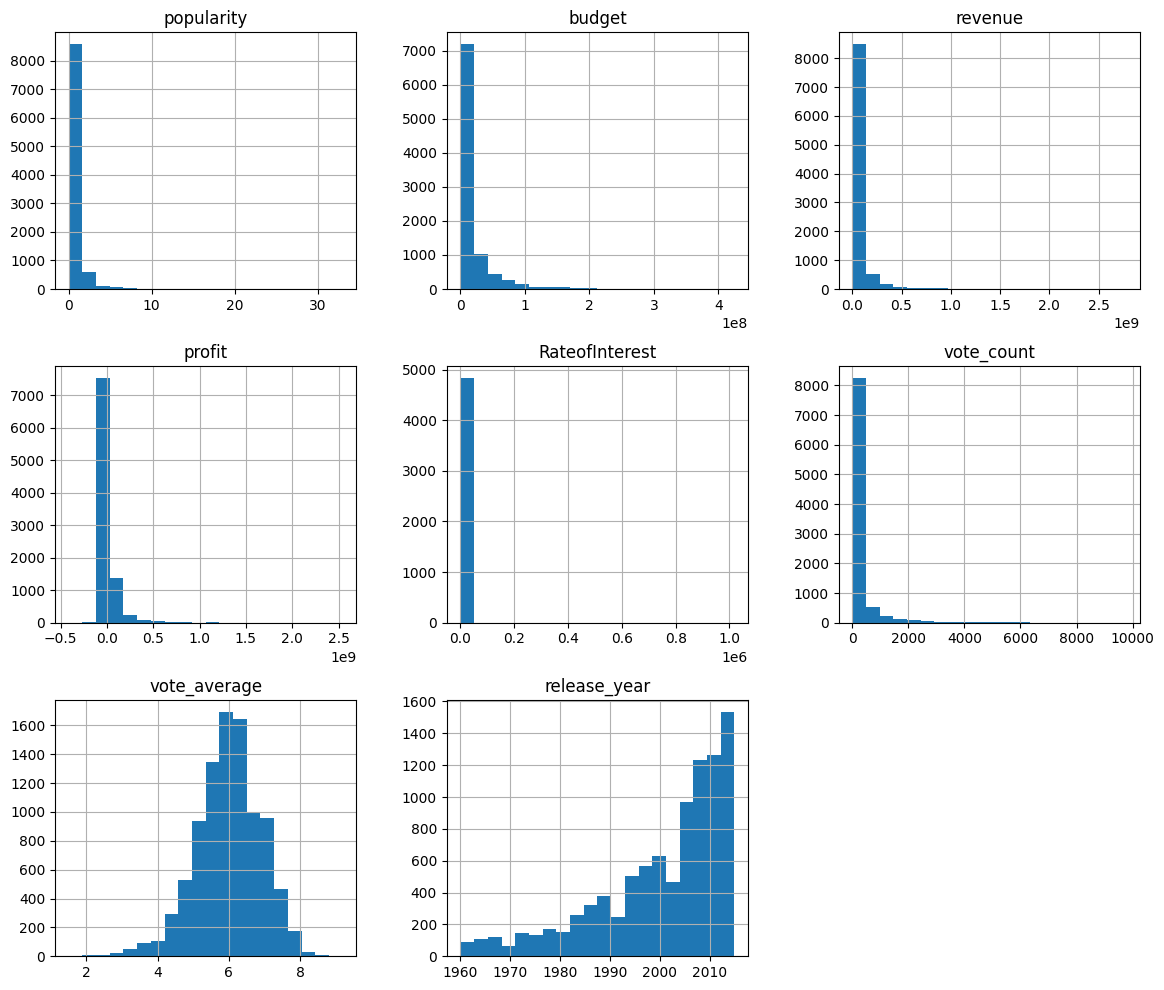

In [50]:
df1.hist(bins = 20, figsize = (14, 12))
plt.show()

In [51]:
df.popularity.value_counts()

popularity
0.28    155
0.32    154
0.21    153
0.20    148
0.14    147
       ... 
5.81      1
5.08      1
3.83      1
3.74      1
2.68      1
Name: count, Length: 483, dtype: int64

<Axes: xlabel='release_year'>

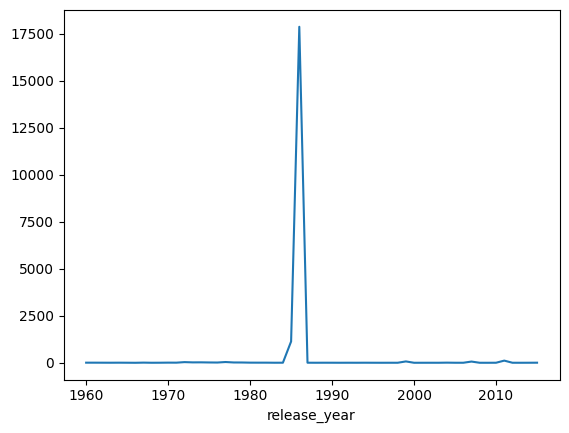

In [54]:
df2 = df.groupby('release_year')['RateofInterest'].mean()
df2.plot(kind = 'line')

Text(0, 0.5, 'popularity')

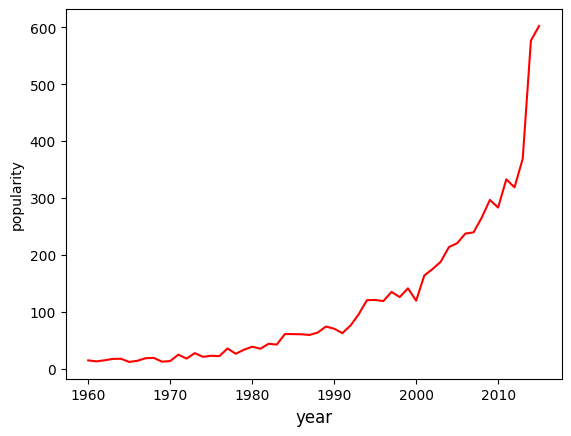

In [58]:
df3 = df.groupby('release_year')['popularity'].sum()
df3.plot(kind = 'line', color = 'red')
plt.xlabel('year', fontsize = 12)
plt.ylabel('popularity')

Text(0, 0.5, 'ratings')

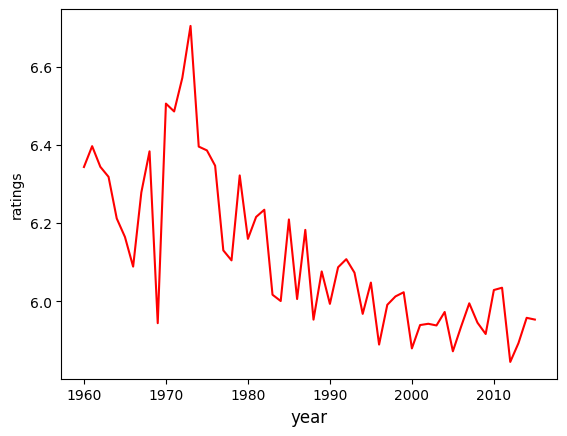

In [62]:
df4 = df.groupby('release_year')['vote_average'].mean()
df4.plot(kind = 'line', color = 'red')
plt.xlabel('year', fontsize = 12)
plt.ylabel('ratings')

Text(0.5, 1.0, 'popularity vs vote average')

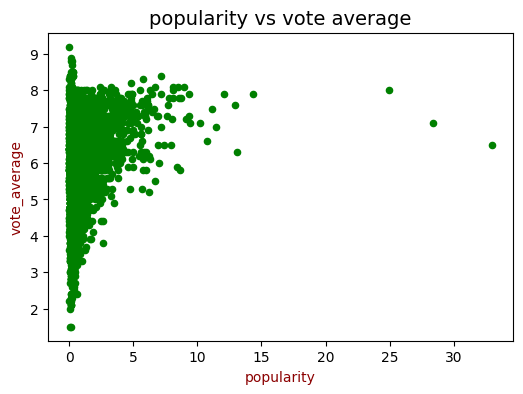

In [67]:
df5 = df.plot.scatter(x = 'popularity', y = 'vote_average', c = 'green', figsize = (6, 4))
df5.set_xlabel('popularity', color = 'DarkRed')
df5.set_ylabel('vote_average', color = 'DarkRed')
df5.set_title('popularity vs vote average', fontsize = 14)

In [69]:
split = ['genres']
for i in split:
    df[i] = df[i].apply(lambda x: x.split("|"))
df.head(3)

,popularity,budget,revenue,profit,RateofInterest,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [70]:
df = df.explode('genres')
df

,popularity,budget,revenue,profit,RateofInterest,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,1/1/66,11,6.5,1966
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [71]:
df7 = df.groupby('genres')['popularity'].sum().sort_values(ascending = True)
df7

genres
Foreign              26.37
TV Movie             35.52
Documentary          79.29
Western              94.31
History             184.92
Music               187.10
War                 188.04
Mystery             532.67
Animation           542.61
Horror              701.55
Fantasy             870.16
Family              894.50
Romance             954.24
Crime               962.08
Science Fiction    1190.15
Adventure          1644.83
Thriller           2040.36
Comedy             2111.52
Action             2121.12
Drama              2654.89
Name: popularity, dtype: float64

<Axes: ylabel='genres'>

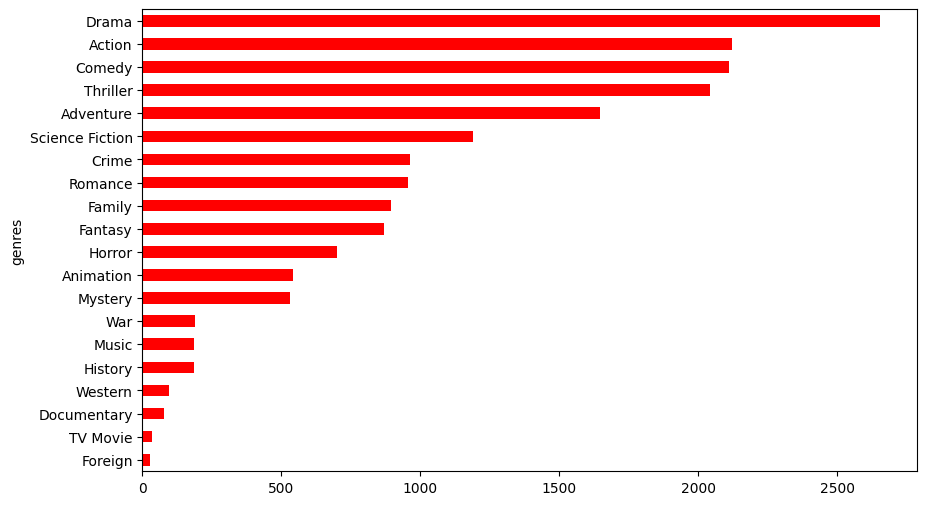

In [77]:
df7.plot.barh(x='genres', y = 'popularity', color = 'red', figsize = (10,6))

In [82]:
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
profit                           int64
RateofInterest                 float64
original_title                  object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [81]:
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\sadai\AppData\Local\Temp\ipykernel_9716\1525507706.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [83]:
df.head(1)

,popularity,budget,revenue,profit,RateofInterest,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [84]:
df['extracted_month'] = df['release_date'].dt.month

In [86]:
df8 = df.groupby('extracted_month')['popularity'].sum()

<Axes: xlabel='extracted_month'>

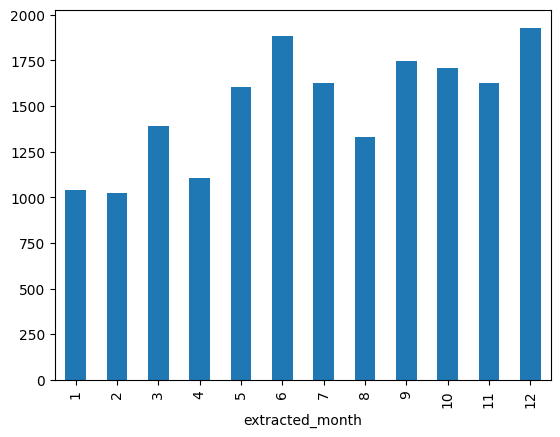

In [88]:
df8.plot(kind = 'bar')

In [89]:
data = {
    'extracted_month' : df8.index,
    'popularity': df8.values
}
df8 = pd.DataFrame(data)

In [91]:
index_to_month = {
    1: 'jan', 2: 'feb', 3: 'march', 4: 'apr', 5: 'june', 6: 'july', 7:'aug', 8:'sept', 9:'oct', 10:'nov', 11:'dec'
}

In [93]:
df8.extracted_month=df8.extracted_month.map(index_to_month)

<Axes: xlabel='extracted_month'>

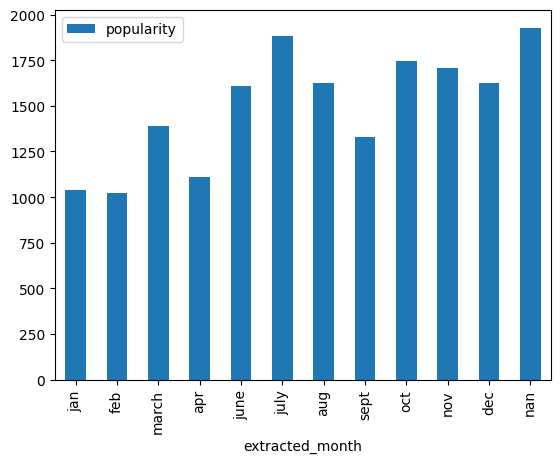

In [94]:
df8.plot(kind = 'bar', x = 'extracted_month', y = 'popularity')

In [95]:
df9=df.groupby('extracted_month')['revenue'].sum()